# Import Libraries and Dependencies

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import scipy

# Basic DataFrame Processing

In [44]:
df = pd.read_csv('/content/Input.csv')
df=df.drop(['Unnamed: 0'], axis=1)
df.head()

,Fe,Mn,Ni,Co,Cr,del_G,del_H,Cp_FCC,VASP-PAW-GGA LSE_Avg,VASP-PAW-GGA LSE_Var,...,Atomic Planar Density_Avg,Atomic Planar Density_Var,C_11_Avg,C_11_Var,C_12_Avg,C_12_Var,C'_Avg,C'_Var,Heat of fusion_Avg,Heat of fusion_Var
0,0.2,0.20,0.0,0.60,0.0,-494.135792,673.733798,39.221444,-3.348,2.241093,...,18.385322,0.232333,251.2,133.806427,200.8,36.212705,25.20,79.788220,15.12,1.336263
1,0.2,0.25,0.0,0.55,0.0,-786.373657,-307.880046,25.528730,-3.399,2.221126,...,18.356324,0.244591,256.4,137.153345,203.3,35.932019,26.55,80.556486,14.97,1.374445
2,0.2,0.30,0.0,0.50,0.0,-767.298921,-300.574605,25.599116,-3.450,2.199795,...,18.327326,0.252961,261.6,140.227815,205.8,35.473370,27.90,81.295080,14.82,1.395564
3,0.2,0.35,0.0,0.45,0.0,-734.739587,-265.447435,25.697948,-3.501,2.177062,...,18.298328,0.257821,266.8,143.047405,208.3,34.829729,29.25,82.004802,14.67,1.400393
4,0.2,0.40,0.0,0.40,0.0,-689.236470,-215.159456,25.779076,-3.552,2.152881,...,18.269330,0.259370,272.0,145.626921,210.8,33.990587,30.60,82.686395,14.52,1.389100


In [45]:
null_counts = df.isnull().sum()
print(null_counts)

Fe                           0
Mn                           0
Ni                           0
Co                           0
Cr                           0
del_G                        9
del_H                        9
Cp_FCC                       9
VASP-PAW-GGA LSE_Avg         0
VASP-PAW-GGA LSE_Var         0
SGTE LSE_Avg                 0
SGTE LSE_Var                 0
Allen EN_Avg                 0
Allen EN_Var                 0
Pauling EN_Avg               0
Pauling EN_Var               0
Density_Avg                  0
Density_Var                  0
Atomic Weight_Avg            0
Atomic Weight_Var            0
Valence e_Avg                0
Valence e_Var                0
IE_Avg                       0
IE_Var                       0
Melting Point_Avg            0
Melting Point_Var            0
Specific Heat_Avg            0
Specific Heat_Var            0
Metallic Radius_Avg          0
Metallic Radius_Var          0
Shear Modulus_Avg            0
Shear Modulus_Var            0
Total El

In [46]:
df = df.dropna()

In [47]:
null_counts = df.isnull().sum()
print(null_counts)

Fe                           0
Mn                           0
Ni                           0
Co                           0
Cr                           0
del_G                        0
del_H                        0
Cp_FCC                       0
VASP-PAW-GGA LSE_Avg         0
VASP-PAW-GGA LSE_Var         0
SGTE LSE_Avg                 0
SGTE LSE_Var                 0
Allen EN_Avg                 0
Allen EN_Var                 0
Pauling EN_Avg               0
Pauling EN_Var               0
Density_Avg                  0
Density_Var                  0
Atomic Weight_Avg            0
Atomic Weight_Var            0
Valence e_Avg                0
Valence e_Var                0
IE_Avg                       0
IE_Var                       0
Melting Point_Avg            0
Melting Point_Var            0
Specific Heat_Avg            0
Specific Heat_Var            0
Metallic Radius_Avg          0
Metallic Radius_Var          0
Shear Modulus_Avg            0
Shear Modulus_Var            0
Total El

In [48]:
df_compositions = df[['Fe','Mn','Ni','Co','Cr']]
df_compositions.head()

,Fe,Mn,Ni,Co,Cr
0,0.2,0.20,0.0,0.60,0.0
1,0.2,0.25,0.0,0.55,0.0
2,0.2,0.30,0.0,0.50,0.0
3,0.2,0.35,0.0,0.45,0.0
4,0.2,0.40,0.0,0.40,0.0


# Properties

In [49]:
df_prop = pd.read_csv('/content/phase_properties.csv')
df_prop = df_prop.drop(['Unnamed: 6'], axis=1)
df_prop = df_prop.iloc[:, [0, 1, 5, 3, 4, 2]]
df_prop.head(15)

,Property,Fe,Mn,Ni,Co,Cr
0,Rm,127.40,130.400,124.60,125.20,136.00
1,Ri,59.00,60.000,59.00,62.00,62.00
2,Rc,116.00,117.000,115.00,116.00,118.00
3,Vm,7.09,7.350,6.59,6.67,7.23
4,E,211.00,198.000,200.00,209.00,279.00
5,K,160.00,120.000,177.30,181.50,160.00
6,G,81.00,79.500,76.00,82.00,115.30
7,v,0.29,0.245,0.31,0.31,0.21
8,Hs,3.75,3.600,4.05,3.90,3.35
9,VEC,8.00,7.000,10.00,9.00,6.00


Properties to be calculated:
1. dHmix

2. VEC

3. EN paulings

4. δ

5. dSmix

6. EN allen

7. Ω

8. Λ


### Enthalpy of Mixing

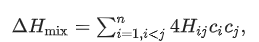

ΔHmix = ∑_{i=1, i<j}^{n} 4H_{ij}C_iC_j

In [50]:
df_H = pd.read_excel('/content/Hmix.xlsx')
df_H = df_H.rename(columns = {'Unnamed: 0':'Elements'})
df_H.head()

,Elements,Fe,Mn,Ni,Co,Cr
0,Fe,0,0,-2,-1,-1
1,Mn,0,0,-8,-5,2
2,Ni,-2,-8,0,0,-7
3,Co,-1,-5,0,0,-4
4,Cr,-1,2,-7,-4,0


In [51]:
def calculate_enthalpy_of_mixing(enthalpy_df, composition_df):
    elements = enthalpy_df.columns[1:]
    enthalpy_values = enthalpy_df.set_index('Elements').loc[elements].values
    compositions = composition_df[elements].values   # Convert percentages to fractions if required

    enthalpy_mixing = []
    for comp in compositions:
        delta_Hmix = 0
        for i in range(len(elements)):
            for j in range(i + 1, len(elements)):
                delta_Hmix += 4 * enthalpy_values[i, j] * comp[i] * comp[j]
        enthalpy_mixing.append(delta_Hmix)

    composition_df['dHmix'] = enthalpy_mixing
    return composition_df

In [52]:
df_compositions = calculate_enthalpy_of_mixing(df_H, df_compositions)
print(df_compositions)

       Fe    Mn    Ni    Co    Cr  dHmix
0     0.2  0.20  0.00  0.60  0.00  -2.88
1     0.2  0.25  0.00  0.55  0.00  -3.19
2     0.2  0.30  0.00  0.50  0.00  -3.40
3     0.2  0.35  0.00  0.45  0.00  -3.51
4     0.2  0.40  0.00  0.40  0.00  -3.52
...   ...   ...   ...   ...   ...    ...
3696  0.5  0.10  0.10  0.20  0.10  -2.24
3697  0.5  0.15  0.15  0.10  0.10  -2.48
3698  0.5  0.15  0.10  0.10  0.15  -2.16
3699  0.5  0.15  0.10  0.15  0.10  -2.23
3700  0.5  0.20  0.10  0.10  0.10  -2.12

[3692 rows x 6 columns]


/tmp/ipython-input-3904752024.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  composition_df['dHmix'] = enthalpy_mixing


### VEC
Valence Electron Concentration

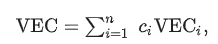

VEC = ∑_{i=1}^{n} c_i VEC_i

In [53]:
def calculate_vec(vec_df, composition_df):
    elements = vec_df.columns[1:6]
    vec_values = vec_df.set_index('Property').loc['VEC'].values
    compositions = composition_df[elements].values  # Convert percentages to fractions if required

    vec_alloy = (compositions * vec_values).sum(axis=1)
    composition_df.loc[:,'VEC'] = vec_alloy
    return composition_df

In [54]:
df_compositions = calculate_vec(df_prop, df_compositions)
print(df_compositions)

       Fe    Mn    Ni    Co    Cr  dHmix   VEC
0     0.2  0.20  0.00  0.60  0.00  -2.88  8.40
1     0.2  0.25  0.00  0.55  0.00  -3.19  8.30
2     0.2  0.30  0.00  0.50  0.00  -3.40  8.20
3     0.2  0.35  0.00  0.45  0.00  -3.51  8.10
4     0.2  0.40  0.00  0.40  0.00  -3.52  8.00
...   ...   ...   ...   ...   ...    ...   ...
3696  0.5  0.10  0.10  0.20  0.10  -2.24  8.10
3697  0.5  0.15  0.15  0.10  0.10  -2.48  8.05
3698  0.5  0.15  0.10  0.10  0.15  -2.16  7.85
3699  0.5  0.15  0.10  0.15  0.10  -2.23  8.00
3700  0.5  0.20  0.10  0.10  0.10  -2.12  7.90

[3692 rows x 7 columns]


/tmp/ipython-input-1680899470.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  composition_df.loc[:,'VEC'] = vec_alloy


### Pauling EN

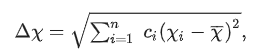

Δχ = √∑_{i=1}^{n} c_i (χ_i - χ̄)²

In [55]:
def calculate_pauling_en(pauling_df, composition_df):
    elements = pauling_df.columns[1:6]
    pauling_values = pauling_df.set_index('Property').loc['Xp'].values
    compositions = composition_df[elements].values  # Convert percentages to fractions if required

    avg_pauling = (compositions * pauling_values).sum(axis=1)
    delta_Xp = np.sqrt((compositions * (pauling_values - avg_pauling[:, None])**2).sum(axis=1))

    composition_df.loc[:,'EN paulings'] = delta_Xp
    return composition_df

In [56]:
df_compositions = calculate_pauling_en(df_prop, df_compositions)
print(df_compositions)

       Fe    Mn    Ni    Co    Cr  dHmix   VEC  EN paulings
0     0.2  0.20  0.00  0.60  0.00  -2.88  8.40     0.154919
1     0.2  0.25  0.00  0.55  0.00  -3.19  8.30     0.166132
2     0.2  0.30  0.00  0.50  0.00  -3.40  8.20     0.174356
3     0.2  0.35  0.00  0.45  0.00  -3.51  8.10     0.180000
4     0.2  0.40  0.00  0.40  0.00  -3.52  8.00     0.183303
...   ...   ...   ...   ...   ...    ...   ...          ...
3696  0.5  0.10  0.10  0.20  0.10  -2.24  8.10     0.124900
3697  0.5  0.15  0.15  0.10  0.10  -2.48  8.05     0.135647
3698  0.5  0.15  0.10  0.10  0.15  -2.16  7.85     0.135923
3699  0.5  0.15  0.10  0.15  0.10  -2.23  8.00     0.135647
3700  0.5  0.20  0.10  0.10  0.10  -2.12  7.90     0.142829

[3692 rows x 8 columns]


/tmp/ipython-input-1327395174.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  composition_df.loc[:,'EN paulings'] = delta_Xp


### Delta

Atomic Size Difference

δ = 100 × √∑_{i=1}^{n} c_i (1 - r_i / r̄)²

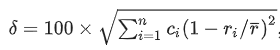

In [57]:
def calculate_atom_size_difference(radius_df, composition_df):
    composition_df = composition_df.copy()
    elements = radius_df.columns[1:6]
    radius_values = radius_df.set_index('Property').loc['Ri'].values
    compositions = composition_df[elements].values  # Convert percentages to fractions if required

    avg_radius = (compositions * radius_values).sum(axis=1)
    delta_r = 100 * np.sqrt((compositions * (1 - radius_values / avg_radius[:, None])**2).sum(axis=1))

    composition_df['δ'] = delta_r
    return composition_df

In [58]:
df_compositions = calculate_atom_size_difference(df_prop, df_compositions)
print(df_compositions)

       Fe    Mn    Ni    Co    Cr  dHmix   VEC  EN paulings         δ
0     0.2  0.20  0.00  0.60  0.00  -2.88  8.40     0.154919  2.073625
1     0.2  0.25  0.00  0.55  0.00  -3.19  8.30     0.166132  2.070529
2     0.2  0.30  0.00  0.50  0.00  -3.40  8.20     0.174356  2.054276
3     0.2  0.35  0.00  0.45  0.00  -3.51  8.10     0.180000  2.024416
4     0.2  0.40  0.00  0.40  0.00  -3.52  8.00     0.183303  1.980198
...   ...   ...   ...   ...   ...    ...   ...          ...       ...
3696  0.5  0.10  0.10  0.20  0.10  -2.24  8.10     0.124900  2.236068
3697  0.5  0.15  0.15  0.10  0.10  -2.48  8.05     0.135647  1.971417
3698  0.5  0.15  0.10  0.10  0.15  -2.16  7.85     0.135923  2.105095
3699  0.5  0.15  0.10  0.15  0.10  -2.23  8.00     0.135647  2.105095
3700  0.5  0.20  0.10  0.10  0.10  -2.12  7.90     0.142829  1.950151

[3692 rows x 9 columns]


### Entropy of Mixing

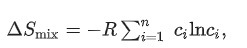

ΔSmix = -R ∑_{i=1}^{n} c_i ln c_i



In [59]:
ideal_gas_constant = scipy.constants.R
print(ideal_gas_constant)

8.31446261815324


In [60]:
def calculate_entropy_of_mixing(entropy_df, composition_df):
    composition_df = composition_df.copy()
    elements = entropy_df.columns[1:6]
    compositions = composition_df[elements].values  # Convert percentages to fractions if required

    delta_S_mix = (-1*ideal_gas_constant) * np.sum(compositions * np.log(compositions, where=compositions > 0), axis=1)

    composition_df['dSmix'] = delta_S_mix
    return composition_df

In [61]:
df_compositions = calculate_entropy_of_mixing(df_prop, df_compositions)
print(df_compositions)

       Fe    Mn    Ni    Co    Cr  dHmix   VEC  EN paulings         δ  \
0     0.2  0.20  0.00  0.60  0.00  -2.88  8.40     0.154919  2.073625   
1     0.2  0.25  0.00  0.55  0.00  -3.19  8.30     0.166132  2.070529   
2     0.2  0.30  0.00  0.50  0.00  -3.40  8.20     0.174356  2.054276   
3     0.2  0.35  0.00  0.45  0.00  -3.51  8.10     0.180000  2.024416   
4     0.2  0.40  0.00  0.40  0.00  -3.52  8.00     0.183303  1.980198   
...   ...   ...   ...   ...   ...    ...   ...          ...       ...   
3696  0.5  0.10  0.10  0.20  0.10  -2.24  8.10     0.124900  2.236068   
3697  0.5  0.15  0.15  0.10  0.10  -2.48  8.05     0.135647  1.971417   
3698  0.5  0.15  0.10  0.10  0.15  -2.16  7.85     0.135923  2.105095   
3699  0.5  0.15  0.10  0.15  0.10  -2.23  8.00     0.135647  2.105095   
3700  0.5  0.20  0.10  0.10  0.10  -2.12  7.90     0.142829  1.950151   

          dSmix  
0      7.900989  
1      8.291777  
2      8.561011  
3      8.718993  
4      8.771094  
...         ...

### Allen EN

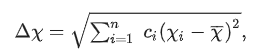

Δχ = √∑_{i=1}^{n} c_i (χ_i - χ̄)²

In [62]:
def calculate_allen_en(allen_df, composition_df):
    composition_df= composition_df.copy()
    elements = allen_df.columns[1:6]
    allen_values = allen_df.set_index('Property').loc['Xa'].values
    compositions = composition_df[elements].values  # Convert percentages to fractions if required

    avg_allen = (compositions * allen_values).sum(axis=1)
    delta_a = np.sqrt((compositions * (allen_values - avg_allen[:, None])**2).sum(axis=1))

    composition_df.loc[:,'EN allen'] = delta_a
    return composition_df

In [63]:
df_compositions = calculate_allen_en(df_prop, df_compositions)
print(df_compositions)

       Fe    Mn    Ni    Co    Cr  dHmix   VEC  EN paulings         δ  \
0     0.2  0.20  0.00  0.60  0.00  -2.88  8.40     0.154919  2.073625   
1     0.2  0.25  0.00  0.55  0.00  -3.19  8.30     0.166132  2.070529   
2     0.2  0.30  0.00  0.50  0.00  -3.40  8.20     0.174356  2.054276   
3     0.2  0.35  0.00  0.45  0.00  -3.51  8.10     0.180000  2.024416   
4     0.2  0.40  0.00  0.40  0.00  -3.52  8.00     0.183303  1.980198   
...   ...   ...   ...   ...   ...    ...   ...          ...       ...   
3696  0.5  0.10  0.10  0.20  0.10  -2.24  8.10     0.124900  2.236068   
3697  0.5  0.15  0.15  0.10  0.10  -2.48  8.05     0.135647  1.971417   
3698  0.5  0.15  0.10  0.10  0.15  -2.16  7.85     0.135923  2.105095   
3699  0.5  0.15  0.10  0.15  0.10  -2.23  8.00     0.135647  2.105095   
3700  0.5  0.20  0.10  0.10  0.10  -2.12  7.90     0.142829  1.950151   

          dSmix  EN allen  
0      7.900989  0.035553  
1      8.291777  0.037613  
2      8.561011  0.039051  
3      8.71

### Omega

Tm * ΔSmix / |ΔHmix|

Measure of the relative contributions of entropy and enthalpy to the Gibbs free energy of mixing.

In [64]:
def calculate_omega(omega_df, composition_df):
    composition_df= composition_df.copy()

    elements = omega_df.columns[1:6]
    Tm_values = omega_df.set_index('Property').loc['Tm'].values
    Smix = composition_df['dSmix'].values
    Hmix = composition_df['dHmix'].values
    compositions = composition_df[elements].values  # Convert percentages to fractions if required

    avg_Tm = (compositions * Tm_values).sum(axis=1)
    Hmix[ np.abs(Hmix) == 0] = 1e-10
    omega = (avg_Tm* Smix) / np.abs(Hmix)

    composition_df['Ω'] = omega
    return composition_df

In [65]:
df_compositions = calculate_omega(df_prop, df_compositions)
print(df_compositions)

       Fe    Mn    Ni    Co    Cr  dHmix   VEC  EN paulings         δ  \
0     0.2  0.20  0.00  0.60  0.00  -2.88  8.40     0.154919  2.073625   
1     0.2  0.25  0.00  0.55  0.00  -3.19  8.30     0.166132  2.070529   
2     0.2  0.30  0.00  0.50  0.00  -3.40  8.20     0.174356  2.054276   
3     0.2  0.35  0.00  0.45  0.00  -3.51  8.10     0.180000  2.024416   
4     0.2  0.40  0.00  0.40  0.00  -3.52  8.00     0.183303  1.980198   
...   ...   ...   ...   ...   ...    ...   ...          ...       ...   
3696  0.5  0.10  0.10  0.20  0.10  -2.24  8.10     0.124900  2.236068   
3697  0.5  0.15  0.15  0.10  0.10  -2.48  8.05     0.135647  1.971417   
3698  0.5  0.15  0.10  0.10  0.15  -2.16  7.85     0.135923  2.105095   
3699  0.5  0.15  0.10  0.15  0.10  -2.23  8.00     0.135647  2.105095   
3700  0.5  0.20  0.10  0.10  0.10  -2.12  7.90     0.142829  1.950151   

          dSmix  EN allen            Ω  
0      7.900989  0.035553  3988.353343  
1      8.291777  0.037613  3746.505483  


In [66]:
elements = df_prop.columns[1:6]
Tm_values = df_prop.set_index('Property').loc['Tm'].values
compositions = df_compositions[['Fe','Mn','Ni','Co','Cr']].values  # Convert percentages to fractions if required
avg_Tm = (compositions * Tm_values).sum(axis=1)
print(avg_Tm)
len(avg_Tm)

[1453.8  1441.35 1428.9  ... 1536.95 1516.35 1503.9 ]


3692

In [67]:
Hmix = df_compositions['dHmix'].values
print(Hmix)
type(Hmix)

[-2.88 -3.19 -3.4  ... -2.16 -2.23 -2.12]


numpy.ndarray

In [68]:
Smix = df_compositions['dSmix'].values
print(Smix)

[ 7.90098888  8.2917768   8.5610115  ... 11.44258466 11.44258466
 11.30132274]


### Lambda

ΔSmix / δ

Geometrical Parameter
Measure of the relative contributions of entropy of mixing and atomic size difference to the formation of solid solution phases.

In [69]:
def calculate_lambda(lambda_df, composition_df):
    composition_df= composition_df.copy()

    elements = lambda_df.columns[1:6]
    Smix = composition_df['dSmix'].values
    delta = composition_df['δ'].values

    lmbda = (Smix) / delta
    composition_df['Λ'] = lmbda
    return composition_df

In [70]:
df_compositions = calculate_lambda(df_prop, df_compositions)
print(df_compositions)

       Fe    Mn    Ni    Co    Cr  dHmix   VEC  EN paulings         δ  \
0     0.2  0.20  0.00  0.60  0.00  -2.88  8.40     0.154919  2.073625   
1     0.2  0.25  0.00  0.55  0.00  -3.19  8.30     0.166132  2.070529   
2     0.2  0.30  0.00  0.50  0.00  -3.40  8.20     0.174356  2.054276   
3     0.2  0.35  0.00  0.45  0.00  -3.51  8.10     0.180000  2.024416   
4     0.2  0.40  0.00  0.40  0.00  -3.52  8.00     0.183303  1.980198   
...   ...   ...   ...   ...   ...    ...   ...          ...       ...   
3696  0.5  0.10  0.10  0.20  0.10  -2.24  8.10     0.124900  2.236068   
3697  0.5  0.15  0.15  0.10  0.10  -2.48  8.05     0.135647  1.971417   
3698  0.5  0.15  0.10  0.10  0.15  -2.16  7.85     0.135923  2.105095   
3699  0.5  0.15  0.10  0.15  0.10  -2.23  8.00     0.135647  2.105095   
3700  0.5  0.20  0.10  0.10  0.10  -2.12  7.90     0.142829  1.950151   

          dSmix  EN allen            Ω         Λ  
0      7.900989  0.035553  3988.353343  3.810231  
1      8.291777  0.03

In [71]:
df_compositions.head()

,Fe,Mn,Ni,Co,Cr,dHmix,VEC,EN paulings,δ,dSmix,EN allen,Ω,Λ
0,0.2,0.20,0.0,0.60,0.0,-2.88,8.4,0.154919,2.073625,7.900989,0.035553,3988.353343,3.810231
1,0.2,0.25,0.0,0.55,0.0,-3.19,8.3,0.166132,2.070529,8.291777,0.037613,3746.505483,4.004666
2,0.2,0.30,0.0,0.50,0.0,-3.40,8.2,0.174356,2.054276,8.561011,0.039051,3597.890978,4.167411
3,0.2,0.35,0.0,0.45,0.0,-3.51,8.1,0.180000,2.024416,8.718993,0.039934,3518.523434,4.306917
4,0.2,0.40,0.0,0.40,0.0,-3.52,8.0,0.183303,1.980198,8.771094,0.040299,3498.470568,4.429403


In [72]:
df_final = df_compositions.iloc[:,5:]
df_final.head()

,dHmix,VEC,EN paulings,δ,dSmix,EN allen,Ω,Λ
0,-2.88,8.4,0.154919,2.073625,7.900989,0.035553,3988.353343,3.810231
1,-3.19,8.3,0.166132,2.070529,8.291777,0.037613,3746.505483,4.004666
2,-3.40,8.2,0.174356,2.054276,8.561011,0.039051,3597.890978,4.167411
3,-3.51,8.1,0.180000,2.024416,8.718993,0.039934,3518.523434,4.306917
4,-3.52,8.0,0.183303,1.980198,8.771094,0.040299,3498.470568,4.429403


# Model Prediction

In [73]:
df_pred = df_final.iloc[:, [4,0,3,1,5,2,6,7]]
df_pred.head()

,dSmix,dHmix,δ,VEC,EN allen,EN paulings,Ω,Λ
0,7.900989,-2.88,2.073625,8.4,0.035553,0.154919,3988.353343,3.810231
1,8.291777,-3.19,2.070529,8.3,0.037613,0.166132,3746.505483,4.004666
2,8.561011,-3.40,2.054276,8.2,0.039051,0.174356,3597.890978,4.167411
3,8.718993,-3.51,2.024416,8.1,0.039934,0.180000,3518.523434,4.306917
4,8.771094,-3.52,1.980198,8.0,0.040299,0.183303,3498.470568,4.429403


In [74]:
# Load the model from the file
pred_model = pickle.load(open("/content/random_forest.pkl", "rb"))

In [75]:
# Load the scaler from the file
pred_scaler = pickle.load(open("/content/scaler.pkl", "rb"))

In [76]:
# Apply the scaler to the DataFrame
df_pred = pd.DataFrame(pred_scaler.transform(df_pred), columns=df_pred.columns)
df_pred.head()

,dSmix,dHmix,δ,VEC,EN allen,EN paulings,Ω,Λ
0,-2.745557,0.600370,-1.110497,1.147432,-0.654394,1.538938,0.238173,0.133694
1,-2.515858,0.555298,-1.111845,1.086134,-0.618581,1.802077,0.226880,0.151465
2,-2.357606,0.524765,-1.118921,1.024835,-0.593584,1.995058,0.219940,0.166339
3,-2.264747,0.508772,-1.131921,0.963536,-0.578235,2.127507,0.216234,0.179089
4,-2.234123,0.507318,-1.151173,0.902237,-0.571898,2.205020,0.215298,0.190284


In [77]:
predictions = pred_model.predict(df_pred)
print(predictions)

[2 2 2 ... 1 2 1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [78]:
# Add predictions as a new column to the DataFrame
df_pred['PHASES'] = predictions

# Output the updated DataFrame
df_pred.head()

,dSmix,dHmix,δ,VEC,EN allen,EN paulings,Ω,Λ,PHASES
0,-2.745557,0.600370,-1.110497,1.147432,-0.654394,1.538938,0.238173,0.133694,2
1,-2.515858,0.555298,-1.111845,1.086134,-0.618581,1.802077,0.226880,0.151465,2
2,-2.357606,0.524765,-1.118921,1.024835,-0.593584,1.995058,0.219940,0.166339,2
3,-2.264747,0.508772,-1.131921,0.963536,-0.578235,2.127507,0.216234,0.179089,2
4,-2.234123,0.507318,-1.151173,0.902237,-0.571898,2.205020,0.215298,0.190284,2


Label Mapping:
BCC_SS -> 0
FCC_PLUS_BCC -> 1
FCC_SS -> 2
Im -> 3



In [79]:
# Create the label mapping dictionary
label_mapping = {
    0: 'BCC_SS',
    1: 'FCC_PLUS_BCC',
    2: 'FCC_SS',
    3: 'Im'
}

# Replace numeric labels with original labels using the mapping dictionary
df_pred['PHASES'] = df_pred['PHASES'].map(label_mapping)
df_pred.head()

,dSmix,dHmix,δ,VEC,EN allen,EN paulings,Ω,Λ,PHASES
0,-2.745557,0.600370,-1.110497,1.147432,-0.654394,1.538938,0.238173,0.133694,FCC_SS
1,-2.515858,0.555298,-1.111845,1.086134,-0.618581,1.802077,0.226880,0.151465,FCC_SS
2,-2.357606,0.524765,-1.118921,1.024835,-0.593584,1.995058,0.219940,0.166339,FCC_SS
3,-2.264747,0.508772,-1.131921,0.963536,-0.578235,2.127507,0.216234,0.179089,FCC_SS
4,-2.234123,0.507318,-1.151173,0.902237,-0.571898,2.205020,0.215298,0.190284,FCC_SS


In [80]:
df_pred['PHASES'].value_counts()

,count
PHASES,
FCC_SS,3061
FCC_PLUS_BCC,328
Im,268
BCC_SS,35


In [81]:
df_pred.to_csv('/content/PhasePredicted.csv')

In [82]:
# Add predictions as a new column to the DataFrame
df_compositions['PHASES'] = predictions

# Output the updated DataFrame
df_compositions.head()

,Fe,Mn,Ni,Co,Cr,dHmix,VEC,EN paulings,δ,dSmix,EN allen,Ω,Λ,PHASES
0,0.2,0.20,0.0,0.60,0.0,-2.88,8.4,0.154919,2.073625,7.900989,0.035553,3988.353343,3.810231,2
1,0.2,0.25,0.0,0.55,0.0,-3.19,8.3,0.166132,2.070529,8.291777,0.037613,3746.505483,4.004666,2
2,0.2,0.30,0.0,0.50,0.0,-3.40,8.2,0.174356,2.054276,8.561011,0.039051,3597.890978,4.167411,2
3,0.2,0.35,0.0,0.45,0.0,-3.51,8.1,0.180000,2.024416,8.718993,0.039934,3518.523434,4.306917,2
4,0.2,0.40,0.0,0.40,0.0,-3.52,8.0,0.183303,1.980198,8.771094,0.040299,3498.470568,4.429403,2


In [83]:
# Create the label mapping dictionary
label_mapping = {
    0: 'BCC_SS',
    1: 'FCC_PLUS_BCC',
    2: 'FCC_SS',
    3: 'Im'
}

# Replace numeric labels with original labels using the mapping dictionary
df_compositions['PHASES'] = df_compositions['PHASES'].map(label_mapping)
df_compositions.head()

,Fe,Mn,Ni,Co,Cr,dHmix,VEC,EN paulings,δ,dSmix,EN allen,Ω,Λ,PHASES
0,0.2,0.20,0.0,0.60,0.0,-2.88,8.4,0.154919,2.073625,7.900989,0.035553,3988.353343,3.810231,FCC_SS
1,0.2,0.25,0.0,0.55,0.0,-3.19,8.3,0.166132,2.070529,8.291777,0.037613,3746.505483,4.004666,FCC_SS
2,0.2,0.30,0.0,0.50,0.0,-3.40,8.2,0.174356,2.054276,8.561011,0.039051,3597.890978,4.167411,FCC_SS
3,0.2,0.35,0.0,0.45,0.0,-3.51,8.1,0.180000,2.024416,8.718993,0.039934,3518.523434,4.306917,FCC_SS
4,0.2,0.40,0.0,0.40,0.0,-3.52,8.0,0.183303,1.980198,8.771094,0.040299,3498.470568,4.429403,FCC_SS


In [84]:
df_compositions.to_csv('/content/PhasePredictedwithComp.csv',index = False)